# Using Feature Extraction Technique RFECV Reverse Feature Extraction 

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTETomek
#Pre-Processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, balanced_accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
# from feature_engine.encoding import OneHotEncoder
# from feature_engine.encoding import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

# import catboost as cb
# 
from xgboost import XGBClassifier
#Feature Importance
# import shap
from sklearn.feature_selection import RFECV

In [3]:
#Dataset
proc_data = pd.read_csv("resampled_data.csv")
proc_data.head()

,PreferredLoginDevice,PreferredPaymentMode,PreferedOrderCat,MaritalStatus,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,1,4,2,2,4.0,6.0,3.0,3,2,9,11.0,1.0,1.0,5.0,159.93,1
1,2,4,2,2,0.0,15.0,2.0,4,5,8,23.0,0.0,1.0,3.0,134.07,1
2,0,4,4,2,0.0,22.0,3.0,5,5,2,22.0,4.0,6.0,7.0,139.19,1
3,1,4,0,2,11.0,6.0,3.0,4,3,10,13.0,0.0,1.0,0.0,153.81,1
4,2,1,3,2,0.0,11.0,2.0,3,3,2,13.0,2.0,2.0,2.0,134.41,1


In [7]:

y = proc_data['Churn']
X = proc_data.drop(['Churn'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

# Initialize RandomForestClassifier
clf = RandomForestClassifier()

# Initialize RFECV
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy')

# Fit RFECV on training data
rfecv.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfecv.support_]

# Transform X_train and X_test based on selected features
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

# Train RandomForestClassifier on selected features
clf.fit(X_train_selected, y_train)

# Predict on test set
y_pred = clf.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.975792507204611


In [33]:
print("Optimal number of features:", rfecv.n_features_)

Optimal number of features: 14


## Columns selected

In [34]:
print("Selected features:", X.columns[rfecv.support_])

Selected features: Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat',
       'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


In [10]:

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'K Nearest Neighbor': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'XG boost': XGBClassifier(),
    'GaussianNB': GaussianNB()
}

# # Train and evaluate models on selected features
# for name, model in models.items():
#     # Train model
#     model.fit(X_train_selected, y_train)
    
#     # Predict on test set
#     y_pred = model.predict(X_test_selected)
    
#     # Calculate accuracy
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"{name} Accuracy: {accuracy}")
evaluation_metrics = []

for model_name, model in models.items():
    model.fit(X_train_selected, y_train)

    y_pred_train = model.predict(X_train_selected)
    y_pred_test = model.predict(X_test_selected)

    metrics_dict = {
        'Model Name': model_name,
        'Accuracy on train data': accuracy_score(y_train, y_pred_train),
        'Accuracy on test data': accuracy_score(y_test, y_pred_test),
        'Precision on train data': precision_score(y_train, y_pred_train),
        'Precision on test data': precision_score(y_test, y_pred_test),
        'Recall on train data': recall_score(y_train, y_pred_train),
        'Recall on test data': recall_score(y_test, y_pred_test),
        'F1-score on train data': f1_score(y_train, y_pred_train),
        'F1-score on test data': f1_score(y_test, y_pred_test),
        'Confusion Matrix on train data': confusion_matrix(y_train, y_pred_train),
        'Confusion Matrix on test data': confusion_matrix(y_test, y_pred_test)
    }

    evaluation_metrics.append(metrics_dict)

for metrics in evaluation_metrics:
    print(metrics)
    print()

{'Model Name': 'Logistic Regression', 'Accuracy on train data': 0.7771188534717074, 'Accuracy on test data': 0.7769452449567723, 'Precision on train data': 0.7524487978628673, 'Precision on test data': 0.7510729613733905, 'Recall on train data': 0.8300589390962672, 'Recall on test data': 0.8187134502923976, 'F1-score on train data': 0.7893507706679123, 'F1-score on test data': 0.7834359261331839, 'Confusion Matrix on train data': array([[1455,  556],
       [ 346, 1690]], dtype=int64), 'Confusion Matrix on test data': array([[648, 232],
       [155, 700]], dtype=int64)}

{'Model Name': 'SVM', 'Accuracy on train data': 0.7521620953792933, 'Accuracy on test data': 0.7510086455331412, 'Precision on train data': 0.7136946628051303, 'Precision on test data': 0.7112887112887113, 'Recall on train data': 0.8472495088408645, 'Recall on test data': 0.8327485380116959, 'F1-score on train data': 0.7747585897147988, 'F1-score on test data': 0.7672413793103448, 'Confusion Matrix on train data': arra

In [11]:
Evaluation_df = pd.DataFrame(evaluation_metrics)
Evaluation_df

,Model Name,Accuracy on train data,Accuracy on test data,Precision on train data,Precision on test data,Recall on train data,Recall on test data,F1-score on train data,F1-score on test data,Confusion Matrix on train data,Confusion Matrix on test data
0,Logistic Regression,0.777119,0.776945,0.752449,0.751073,0.830059,0.818713,0.789351,0.783436,"[[1455, 556], [346, 1690]]","[[648, 232], [155, 700]]"
1,SVM,0.752162,0.751009,0.713695,0.711289,0.847250,0.832749,0.774759,0.767241,"[[1319, 692], [311, 1725]]","[[591, 289], [143, 712]]"
2,Random Forest,1.000000,0.975216,1.000000,0.970998,1.000000,0.978947,1.000000,0.974956,"[[2011, 0], [0, 2036]]","[[855, 25], [18, 837]]"
3,K Nearest Neighbor,0.924141,0.897983,0.871828,0.832353,0.995580,0.992982,0.929603,0.905600,"[[1713, 298], [9, 2027]]","[[709, 171], [6, 849]]"
4,Decision Tree,1.000000,0.944669,1.000000,0.942824,1.000000,0.945029,1.000000,0.943925,"[[2011, 0], [0, 2036]]","[[831, 49], [47, 808]]"
5,AdaBoost Classifier,0.884853,0.880115,0.881809,0.886499,0.890472,0.867836,0.886119,0.877069,"[[1768, 243], [223, 1813]]","[[785, 95], [113, 742]]"
6,XG boost,1.000000,0.977522,1.000000,0.980000,1.000000,0.974269,1.000000,0.977126,"[[2011, 0], [0, 2036]]","[[863, 17], [22, 833]]"
7,GaussianNB,0.706202,0.709510,0.683096,0.683003,0.776031,0.766082,0.726604,0.722161,"[[1278, 733], [456, 1580]]","[[576, 304], [200, 655]]"


In [12]:
df_sorted = Evaluation_df.sort_values(by='Accuracy on test data', ascending=False)
print(df_sorted[['Model Name', 'Accuracy on test data']])

            Model Name  Accuracy on test data
6             XG boost               0.977522
2        Random Forest               0.975216
4        Decision Tree               0.944669
3   K Nearest Neighbor               0.897983
5  AdaBoost Classifier               0.880115
0  Logistic Regression               0.776945
1                  SVM               0.751009
7           GaussianNB               0.709510


In [13]:
import plotly.express as px

# Melting the DataFrame to have a tidy format for visualization
df_melted = df_sorted.melt(id_vars='Model Name', value_vars=['Accuracy on train data', 'Accuracy on test data',
                                                             'Precision on train data', 'Precision on test data',
                                                             'Recall on train data', 'Recall on test data',
                                                             'F1-score on train data', 'F1-score on test data'],
                           var_name='Metric', value_name='Score')

# Creating a grouped bar chart
fig = px.bar(df_melted, x='Model Name', y='Score', color='Metric',
             barmode='group', title='Performance Metrics Comparison by Model',
             labels={'Score': 'Score', 'Model Name': 'Model', 'Metric': 'Metric'})

fig.show()


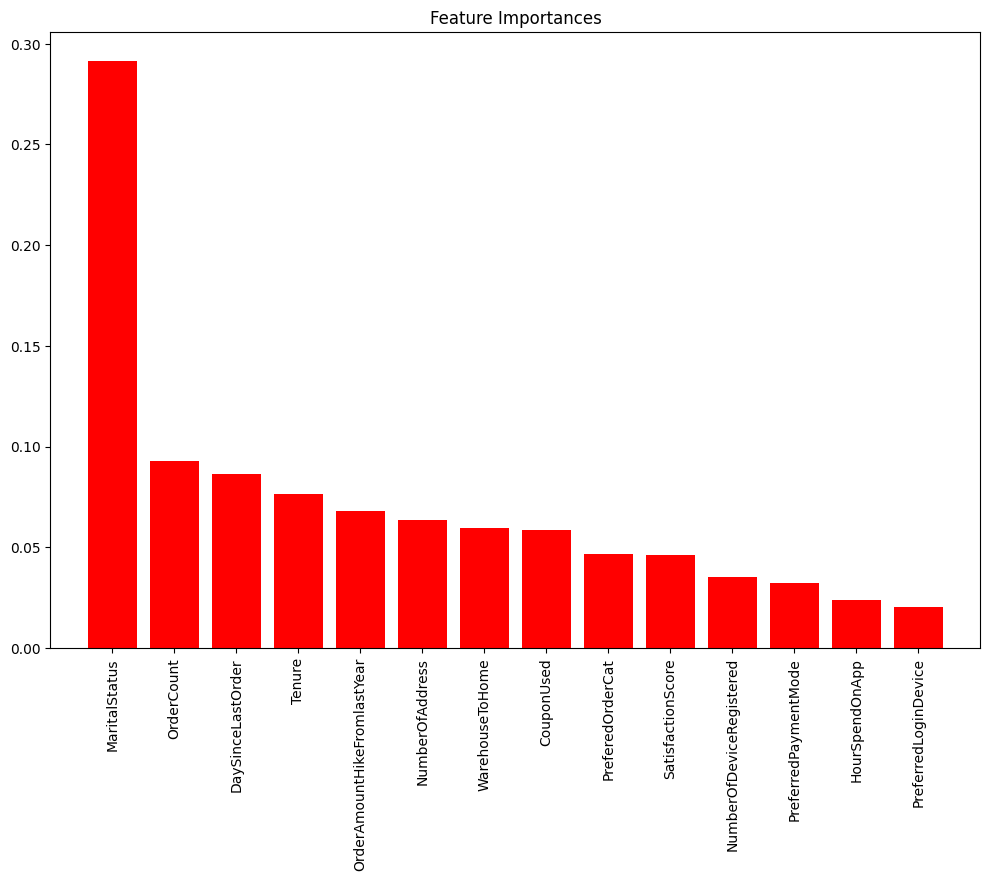

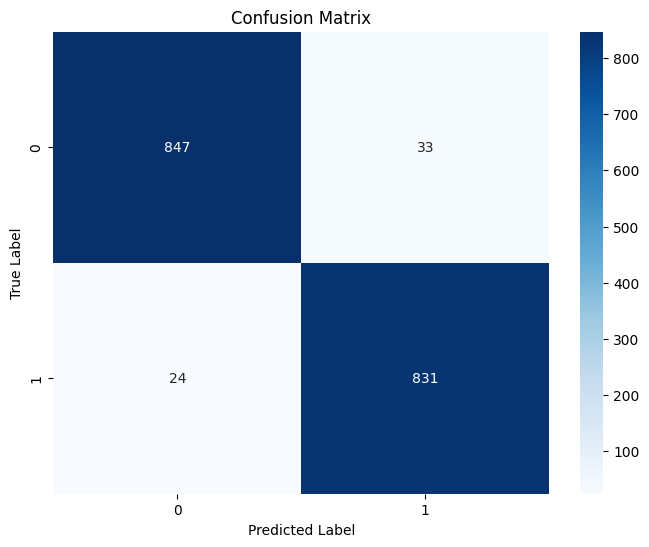

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train_selected, y_train)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
#plot
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train_selected.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_train_selected.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train_selected.shape[1]])
plt.show()

y_pred = rf_model.predict(X_test_selected)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Define the parameter grid for AdaBoost
adb_param_grid = {
    'n_estimators': [50, 100, 150],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0] # Learning rate
}

# Initialize models with default parameters
rf_model = RandomForestClassifier()
adb_model = AdaBoostClassifier()

# Perform grid search for Random Forest
rf_grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=rf_param_grid, 
    scoring='roc_auc', 
    verbose=2,
    n_jobs=-1
)
rf_grid_search.fit(X_train_selected, y_train)

# Perform grid search for AdaBoost
adb_grid_search = GridSearchCV(
    estimator=adb_model, 
    param_grid=adb_param_grid, 
    scoring='roc_auc', 
    verbose=2,
    n_jobs=-1
)
adb_grid_search.fit(X_train_selected, y_train)

# Get best parameters
best_rf_params = rf_grid_search.best_params_
best_adb_params = adb_grid_search.best_params_

# Set best parameters to models
rf_model.set_params(**best_rf_params)
adb_model.set_params(**best_adb_params)

# Train ensemble models
ensemble_models = [
    ("Random Forest", rf_model),
    ("AdaBoost", adb_model)
]

for name, model in ensemble_models:
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")


Fitting 5 folds for each of 81 candidates, totalling 405 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


# DEEP NEURAL NETWORK

In [32]:

import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_dim=X_train_selected.shape[1]))
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_selected, y_train, batch_size=32, epochs=10)

loss, accuracy = model.evaluate(X_test_selected, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/10
127/127 [==============================] - 2s 4ms/step - loss: 0.6919 - accuracy: 0.6931
Epoch 2/10
127/127 [==============================] - 1s 4ms/step - loss: 0.5638 - accuracy: 0.7423
Epoch 3/10
127/127 [==============================] - 0s 4ms/step - loss: 0.5249 - accuracy: 0.7774
Epoch 4/10
127/127 [==============================] - 1s 5ms/step - loss: 0.5165 - accuracy: 0.7707
Epoch 5/10
127/127 [==============================] - 1s 4ms/step - loss: 0.4948 - accuracy: 0.7761
Epoch 6/10
127/127 [==============================] - 1s 4ms/step - loss: 0.4817 - accuracy: 0.7937
Epoch 7/10
127/127 [==============================] - 1s 4ms/step - loss: 0.5162 - accuracy: 0.7801
Epoch 8/10
127/127 [==============================] - 1s 4ms/step - loss: 0.4593 - accuracy: 0.7991
Epoch 9/10
127/127 [==============================] - 1s 4ms/step - loss: 0.4771 - accuracy: 0.7863
Epoch 10/10
55/55 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.8207
T